<h1><center>Fraud Detection in Auto Insurance Claims using Machine Learning Algorithms</center></h1>

<h2> Background study </h2>

Insurance fraud refers to any deliberate act of deceiving an insurance company for financial gain. This can involve providing false information when applying for insurance, exaggerating, or fabricating claims, or intentionally causing damage or injury in order to receive insurance payouts. Insurance fraud can be committed by individuals, groups, or businesses and can result in significant financial losses for insurance companies, which can ultimately drive up the cost of insurance for everyone. Insurance fraud is illegal and can result in criminal charges and penalties, including fines, imprisonment, and forfeiture of assets.

Auto insurers lose at least $ 29 billion a year, according to a 2017 study by Verisk, to premium leakage, the "omitted or misstated underwriting information that leads to inaccurate rates." 

Several types of information failures and fraudulent practices drive costs up, such as unrecognized drivers ($ 10.3 billion), underestimated mileage ($ 5.4 billion), violations/accidents ($ 3.4 billion), and false garaging to lower premiums ($ 2.9 billion). While not always a result of malicious or conscious actions, premium leakage creates problems for consumers, too—as much as 14 percent of all personal auto premiums can be attributed to the cost of covering premium leakage.

No-fault auto insurance is a system that lets policyholders recover financial losses from their own insurance company, regardless of who was at fault in a motor vehicle accident. However, in many no-fault states, unscrupulous medical providers, attorneys, and others pad costs associated with legitimate claims – for example, by billing an insurer for a medical procedure never performed. 

Source: https://www.iii.org/article/background-on-insurance-fraud

<h2> Objective </h2>

To develop a machine learning model capable of identifying instances of auto insurance fraud.

<h2> Dataset description </h2>

The data set consist of 1000 auto incidents and auto insurance claims from Ohio, Illinois and Indiana from 01 January 2015 to 01 March 2015. The data set has a total of 39 variables.

<h3> Variables </h3>

'months_as_customer': The number of months the customer has been associated with the insurance company.

'age': The age of the customer.

'policy_number': A unique identifier for the insurance policy.

'policy_bind_date': The date the insurance policy was issued.

'policy_state': The state where the insurance policy was issued.

'policy_csl': The coverage limit for the insurance policy in the format of "policy bodily injury liability / policy property damage liability".

'policy_deductable': The amount of money the policyholder is responsible for paying out of pocket before insurance coverage begins.

'policy_annual_premium': The yearly cost of the insurance policy.

'umbrella_limit': The maximum amount that the insurance company will pay out for a given claim.

'insured_zip': The zip code of the policyholder.

'insured_sex': The gender of the policyholder.

'insured_education_level': The highest level of education completed by the policyholder.

'insured_occupation': The occupation of the policyholder.

'insured_hobbies': The hobbies of the policyholder.

'insured_relationship': The relationship of the policyholder to the named insured.

'capital-gains': The amount of capital gains for the policyholder.

'capital-loss': The amount of capital losses for the policyholder.

'incident_date': The date the incident occurred.

'incident_type': The type of incident that occurred (e.g., collision, theft, fire, etc.).

'collision_type': The type of collision that occurred (if applicable).

'incident_severity': The severity of the incident (e.g., minor, major, total loss, etc.).

'authorities_contacted': Which authorities were contacted (e.g., police, fire department, etc.).

'incident_state': The state where the incident occurred.

'incident_city': The city where the incident occurred.

'incident_location': The location where the incident occurred.

'incident_hour_of_the_day': The hour of the day when the incident occurred.

'number_of_vehicles_involved': The number of vehicles involved in the incident.

'property_damage': Whether or not there was property damage as a result of the incident.

'bodily_injuries': The number of bodily injuries that occurred as a result of the incident.

'witnesses': The number of witnesses to the incident.

'police_report_available': Whether or not a police report was available for the incident.

'total_claim_amount': The total amount of the claim.

'injury_claim': The amount claimed for bodily injuries.

'property_claim': The amount claimed for property damage.

'vehicle_claim': The amount claimed for vehicle damage.

'auto_make': The make of the vehicle.

'auto_model': The model of the vehicle.

'auto_year': The year of the vehicle.

'fraud_reported': Whether or not fraud was reported for the claim.

Source: https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/4954928053318020/1058911316420443/167703932442645/latest.html

In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('insuranceFraud.csv')

<h2> Data Pre-Processing </h2>

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
995,3,38,941851,7/16/1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,1/5/2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2/17/2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,11/11/1996,OH,250/500,1000,766.19,0,612260,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N


In [5]:
# Generate summary statistics for each column in a pandas DataFrame
missing_stats = []
for col in df.columns:
    nunique = df[col].nunique()
    percent_missing = np.round(df[col].isnull().mean() * 100, 2)
    dtype = df[col].dtype
    missing_stats.append((col, nunique, percent_missing, dtype))
    

In [6]:
# Create a new DataFrame with the summary statistics
stats_df = pd.DataFrame(missing_stats, columns=['feature', 'unique_values', 'percent_missing', 'type'])
stats_df = stats_df.sort_values('percent_missing', ascending=False)

In [7]:
stats_df

,feature,unique_values,percent_missing,type
0,months_as_customer,391,0.0,int64
29,witnesses,4,0.0,int64
22,incident_state,7,0.0,object
23,incident_city,7,0.0,object
24,incident_location,1000,0.0,object
25,incident_hour_of_the_day,24,0.0,int64
26,number_of_vehicles_involved,4,0.0,int64
27,property_damage,3,0.0,object
28,bodily_injuries,3,0.0,int64
30,police_report_available,3,0.0,object


In [8]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [9]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [10]:
#extract out the year as 

df['policy_bind_year'] = pd.to_datetime(df['policy_bind_date']).dt.year

#A new variable 'policy_bind_year was extracted from policy_bind_date using regex to 
#reduce the number of categories the variable had. 

In [11]:
#extract the month out 
#all accidents are from 2015 jan and feb, so year isnt very important

df['incident_month'] = pd.to_datetime(df['incident_date']).dt.month

In [12]:
#replace "?" with undocumented 

df = df.replace({
    'collision_type': {'?': 'undocumented'},
    'police_report_available': {'?': 'undocumented'},
    'property_damage': {'?': 'undocumented'},
    'auto_make': {'Suburu': 'Subaru'}
})

#There were 4 variables (collision_type, police_report_available, property_damage, auto_make) which contained values "?".
#So we  replaced with the word "undocumented" instead of dropping them as they may be important. Missing information from these 
#variables may be a predictor to fraud. Missing information on a collision type or on a police report seems suspicious,
#for instance.

In [13]:
df['incident_severity'] = pd.Categorical(df['incident_severity'], 
                                          categories=["Trivial Damage", "Minor Damage", "Major Damage", "Total Loss"],
                                          ordered=True).codes


In [14]:
df.incident_severity.value_counts()

1    354
3    280
2    276
0     90
Name: incident_severity, dtype: int64

In [15]:
#umbrella limit is like an insurance  that pays our liabilities in case we get sued
#cannot be zero
#this 0 is an error

df['umbrella_limit'].sort_values(ascending=True)

290    -1000000
0             0
623           0
624           0
625           0
         ...   
657     9000000
458     9000000
975     9000000
430    10000000
115    10000000
Name: umbrella_limit, Length: 1000, dtype: int64

In [16]:
#edit to positve
df['umbrella_limit'].iloc[290] = 1000000


C:\Users\celvi\AppData\Local\Temp\ipykernel_16716\1157188289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['umbrella_limit'].iloc[290] = 1000000


In [17]:
df['umbrella_limit'].iloc[290]

1000000

In [18]:
df['umbrella_limit'].sort_values(ascending=True)

0             0
622           0
623           0
624           0
625           0
         ...   
700     9000000
88      9000000
975     9000000
115    10000000
430    10000000
Name: umbrella_limit, Length: 1000, dtype: int64

Data types have been identified (nominal, ordinal, interval/ratio). Ordinal variables were coded and treated as quantitative. For example, incident severity was coded from 0 to 3 in order of severity. After that, nominal data were analysed. Those with too many unique categories may not be useful. Variable with more than 20 unique categories was inspected. Some of these variables were dropped. For example, incident location which had 1000 unique variable, insured zip which had 995 variables. One of the variables that had smaller number of categories exceeding 20 was auto model. The variable's correlation was analysed against fraud_reported to see if it is meaningful to keep this variable. As auto make was already recorded, this variable was dropped. In sum, all nominal variables with more than 20 categories were dropped after investigations.

In [19]:
all_var = list(df.columns)
len(all_var)

41

In [20]:
#continuous variables = ordinal, interval, ratio

cont_var =['age','incident_hour_of_the_day',
           'number_of_vehicles_involved','total_claim_amount',
           'injury_claim','property_claim','vehicle_claim',
           'months_as_customer','policy_annual_premium','policy_deductable',
           'umbrella_limit','capital-gains','capital-loss', 
           'auto_year','witnesses','bodily_injuries','policy_bind_year','incident_severity']

len(cont_var)

18

In [21]:
#ordinal var

ord_var = ['policy_deductable','witnesses','bodily_injuries','incident_severity']
len(ord_var)


4

In [22]:
#quan var = interval or ratio 

quan_var = (list(set(cont_var) - set(ord_var))) 
len(quan_var)

14

In [23]:
#norminal aka discrete var

nom_var = (list(set(all_var) - set(cont_var))) 
len(nom_var)

23

In [24]:
#check for norminal data with very large number of categories

for col in nom_var:
    print("###", col, "###" )
    print("  ")
    print(df[col].value_counts())
    print("---------------------------------------------")
    print("  ")

### auto_model ###
  
RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64
---------------------------------------------
  
### incident_city ###
  
Springfield    157
Arlington      152
Columbus       1

In [25]:
#for those that have not too many unique, we can plot them out

large_cat = []

for col in nom_var:
    if df[col].nunique() > 20:
        large_cat.append(col)
        print(col, df[col].nunique())
    else: 
        pass
    
#incident location, insured zip, policy bind date, policy number too many unique to be meaningful

auto_model 39
insured_zip 995
policy_bind_date 951
policy_number 1000
incident_date 60
incident_location 1000


In [26]:
#get a data frame with var that have large num categories
#only auto model 
large_dummy = pd.get_dummies(df[['auto_model','incident_date']], drop_first=True)

#put in the DV
large_dummy['fraud_reported']=df['fraud_reported']

#numerical code the DV
large_dummy['fraud_reported'] = large_dummy['fraud_reported'].map({"Y":1,"N":0})

#unique to each case. wont be useful
large_dummy.head(10)

,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,...,incident_date_2/28/2015,incident_date_2/3/2015,incident_date_2/4/2015,incident_date_2/5/2015,incident_date_2/6/2015,incident_date_2/7/2015,incident_date_2/8/2015,incident_date_2/9/2015,incident_date_3/1/2015,fraud_reported
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
corr = large_dummy.corr()

In [28]:
corr

,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,...,incident_date_2/28/2015,incident_date_2/3/2015,incident_date_2/4/2015,incident_date_2/5/2015,incident_date_2/6/2015,incident_date_2/7/2015,incident_date_2/8/2015,incident_date_2/9/2015,incident_date_3/1/2015,fraud_reported
auto_model_92x,1.000000,-0.027178,-0.028273,-0.033269,-0.030859,-0.019479,-0.022979,-0.024246,-0.028807,-0.025456,...,-0.022979,-0.019479,0.012991,-0.021643,0.062348,0.043863,-0.022320,-0.019479,-0.018705,0.015236
auto_model_93,-0.027178,1.000000,-0.026674,-0.031387,-0.029114,-0.018377,-0.021679,-0.022875,-0.027178,-0.024016,...,0.074674,-0.018377,-0.025110,-0.020419,-0.022875,-0.016093,-0.021058,-0.018377,0.041177,-0.017451
auto_model_95,-0.028273,-0.026674,1.000000,-0.032652,-0.030287,-0.019118,-0.022553,-0.023797,-0.028273,-0.024984,...,0.023852,-0.019118,-0.026122,0.077099,0.020272,-0.016742,-0.021907,-0.019118,0.038304,-0.023877
auto_model_A3,-0.033269,-0.031387,-0.032652,1.000000,-0.035639,-0.022496,-0.026538,-0.028002,-0.033269,-0.029399,...,-0.026538,0.024273,-0.030737,0.017226,0.009839,-0.019700,0.015204,0.024273,0.027052,0.010577
auto_model_A5,-0.030859,-0.029114,-0.030287,-0.035639,1.000000,-0.020867,-0.024616,-0.025974,-0.030859,-0.027270,...,-0.024616,0.079453,0.008613,-0.023185,-0.025974,0.038831,-0.023910,-0.020867,0.032144,0.040789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
incident_date_2/7/2015,0.043863,-0.016093,-0.016742,-0.019700,0.038831,-0.011534,-0.013607,-0.014358,-0.017058,-0.015074,...,-0.013607,-0.011534,-0.015760,-0.012816,-0.014358,1.000000,-0.013217,-0.011534,-0.011076,0.035656
incident_date_2/8/2015,-0.022320,-0.021058,-0.021907,0.015204,-0.023910,-0.015092,0.040380,0.036468,-0.022320,0.033014,...,-0.017804,-0.015092,-0.020622,-0.016769,-0.018787,-0.013217,1.000000,-0.015092,-0.014493,0.104053
incident_date_2/9/2015,-0.019479,-0.018377,-0.019118,0.024273,-0.020867,-0.013171,-0.015538,0.109721,-0.019479,-0.017213,...,-0.015538,-0.013171,-0.017997,-0.014634,-0.016395,-0.011534,-0.015092,1.000000,-0.012648,-0.024790
incident_date_3/1/2015,-0.018705,0.041177,0.038304,0.027052,0.032144,0.068429,-0.014921,-0.015744,-0.018705,-0.016529,...,-0.014921,-0.012648,-0.017282,-0.014053,-0.015744,-0.011076,-0.014493,-0.012648,1.000000,0.022062


In [29]:
#drop variables from analysis 

df.drop(large_cat, axis=1, inplace=True)

In [30]:
#redefine the norminal var
#remove dv from the list

nom_var.remove('fraud_reported')
nom_var = (list(set(nom_var) - set(large_cat))) 
len(nom_var)

16

In [31]:
#check columns add up 

print ('total var count:{}'.format(len(list(df.columns))),
       'continous var count:{}'.format(len(cont_var)),
       'norminal var count:{}'.format(len(nom_var)))

total var count:35 continous var count:18 norminal var count:16


<h2>Exploratory Data Analysis</h2>

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
#count each level of the Dv

df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

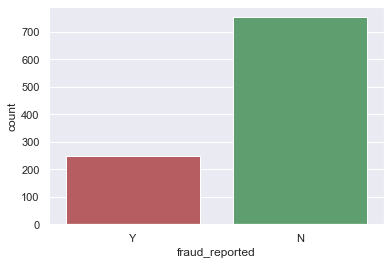

In [34]:
sns.set()
sns.countplot(x ="fraud_reported", data=df, palette=['r','g']);

In [35]:
corr = df[cont_var].corr()
corr

,age,incident_hour_of_the_day,number_of_vehicles_involved,total_claim_amount,injury_claim,property_claim,vehicle_claim,months_as_customer,policy_annual_premium,policy_deductable,umbrella_limit,capital-gains,capital-loss,auto_year,witnesses,bodily_injuries,policy_bind_year,incident_severity
age,1.000000,0.087161,0.022102,0.069863,0.075522,0.060898,0.062588,0.922098,0.014404,0.029188,0.018425,-0.007075,0.007368,0.001354,0.052359,-0.015679,-0.037444,0.009513
incident_hour_of_the_day,0.087161,1.000000,0.120794,0.217702,0.165768,0.179536,0.215626,0.070639,-0.001578,0.060935,-0.023097,-0.016406,-0.025054,0.021368,0.006527,-0.034563,0.035412,0.188339
number_of_vehicles_involved,0.022102,0.120794,1.000000,0.274278,0.224650,0.219084,0.269393,0.014736,-0.045991,0.051214,-0.021997,0.061643,-0.014895,0.034554,-0.014669,0.014030,0.026595,0.237425
total_claim_amount,0.069863,0.217702,0.274278,1.000000,0.805025,0.810686,0.982773,0.062108,0.009094,0.022839,-0.038994,0.015980,-0.036060,-0.035781,-0.011114,0.047093,-0.000146,0.495676
injury_claim,0.075522,0.165768,0.224650,0.805025,1.000000,0.563866,0.722878,0.065329,-0.017633,0.039107,-0.045229,0.025934,-0.046060,-0.013718,-0.024843,0.047319,0.002529,0.361477
property_claim,0.060898,0.179536,0.219084,0.810686,0.563866,1.000000,0.732090,0.034940,-0.011654,0.064792,-0.022044,-0.000779,-0.022863,-0.014508,0.052640,0.039749,-0.000970,0.384283
vehicle_claim,0.062588,0.215626,0.269393,0.982773,0.722878,0.732090,1.000000,0.061013,0.020246,0.005269,-0.037190,0.015836,-0.032665,-0.042768,-0.022564,0.043449,-0.000610,0.501328
months_as_customer,0.922098,0.070639,0.014736,0.062108,0.065329,0.034940,0.061013,1.000000,0.005018,0.026807,0.016111,0.006399,0.020209,-0.000292,0.058383,-0.010162,-0.048276,0.003005
policy_annual_premium,0.014404,-0.001578,-0.045991,0.009094,-0.017633,-0.011654,0.020246,0.005018,1.000000,-0.003245,-0.005956,-0.013738,0.023547,-0.049226,0.002332,0.026780,0.001249,0.020233
policy_deductable,0.029188,0.060935,0.051214,0.022839,0.039107,0.064792,0.005269,0.026807,-0.003245,1.000000,0.009968,0.035212,-0.023544,0.026105,0.066639,-0.022765,-0.049598,0.012795


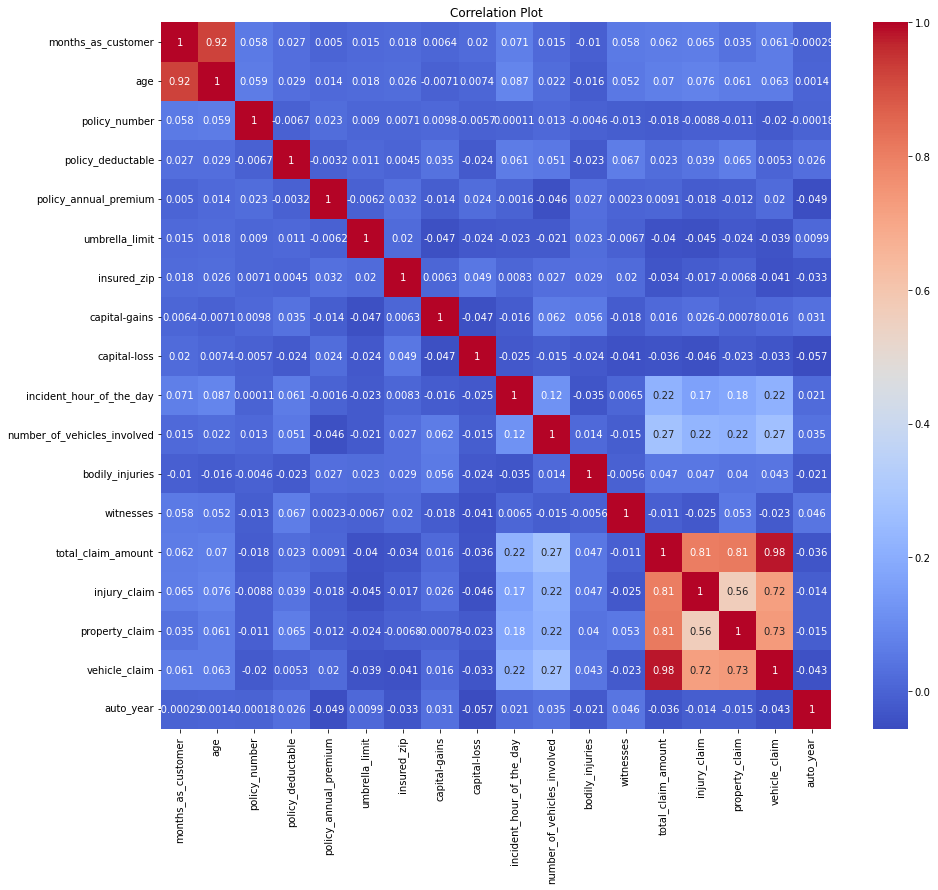

In [14]:
fig, ax = plt.subplots(figsize=(15,13))
sns.heatmap(df.corr() , annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Plot')
plt.show()

C:\Users\celvi\AppData\Local\Temp\ipykernel_16716\1681132232.py:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


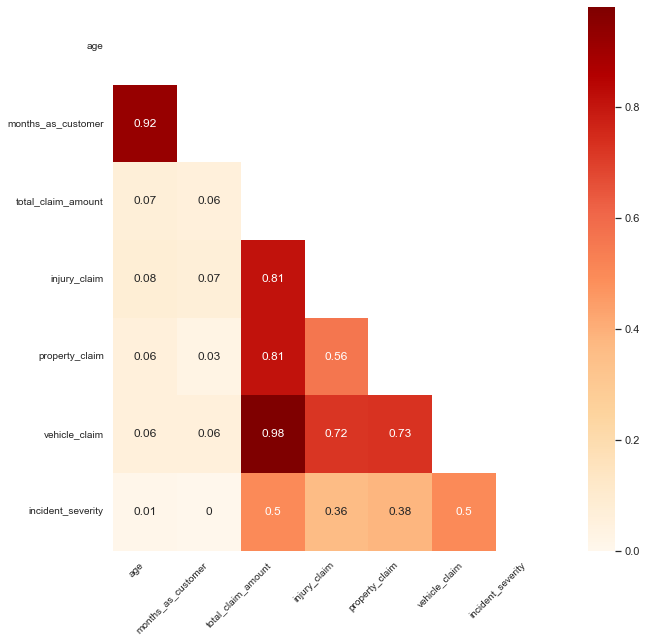

In [36]:
sns.set_style('white')

# heatmap from those with at least 0.3 magnitude in corr, includeing the DV
corr_list=['age','months_as_customer','total_claim_amount',
           'injury_claim', 'property_claim','vehicle_claim',
           'incident_severity','fraud_reported']

corr_df = df[corr_list]
corr=round(corr_df.corr(),2)

# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(10,10))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  #triu triangle upper

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True, cmap='OrRd')

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, ha= 'right', rotation=45 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, va="center", rotation=0)

plt.show()

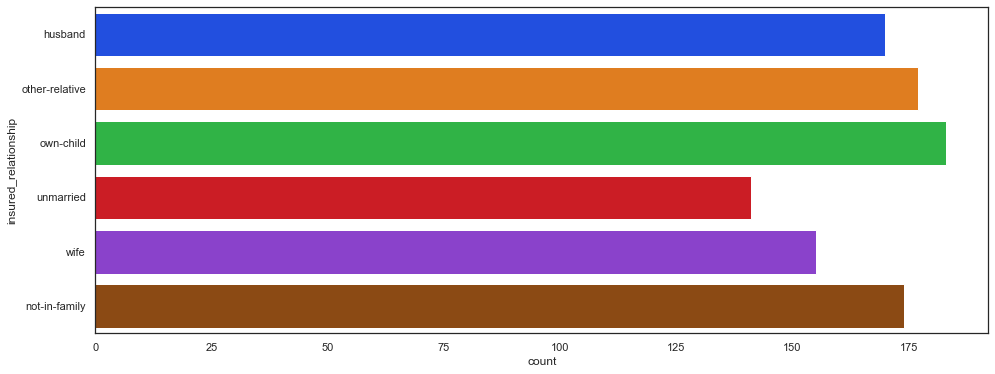

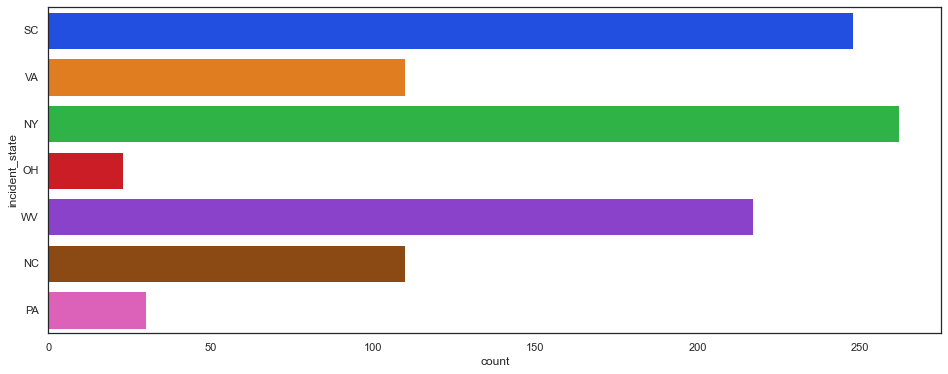

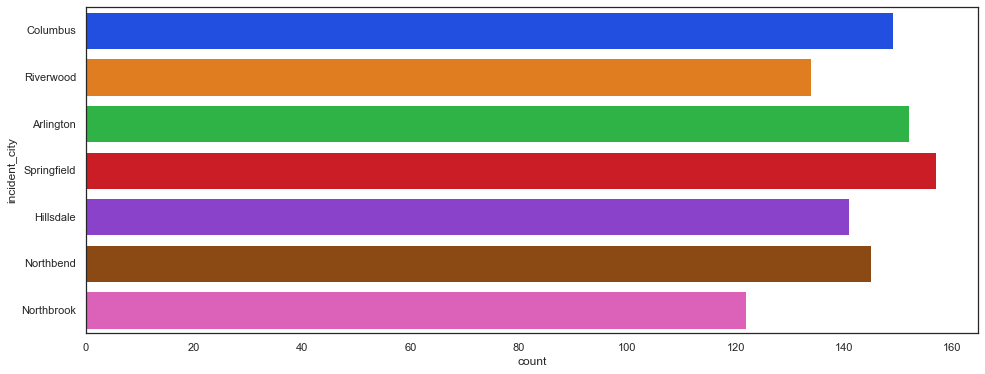

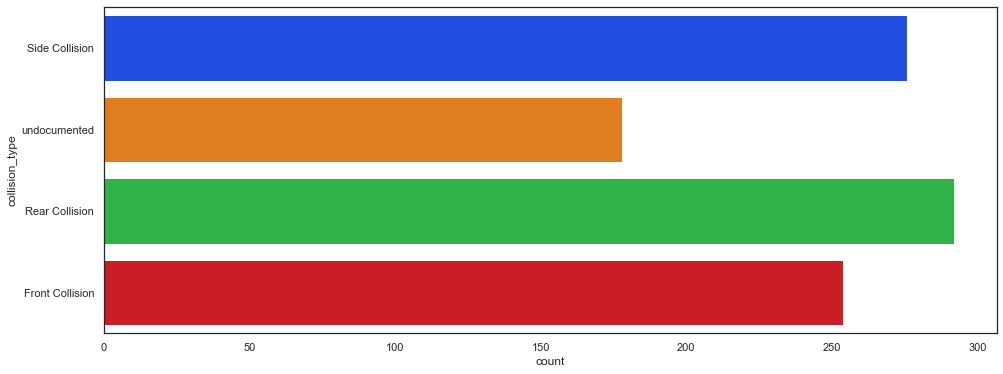

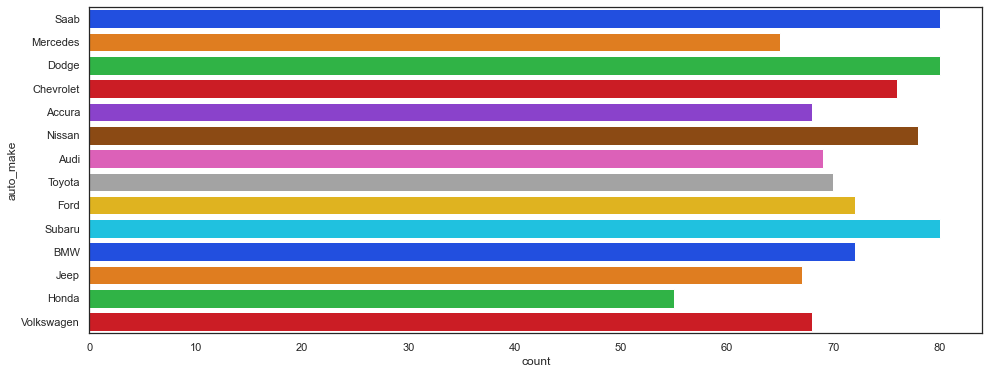

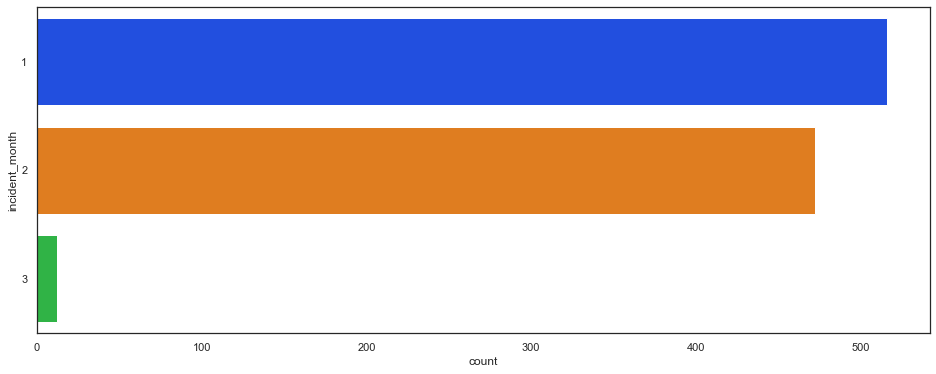

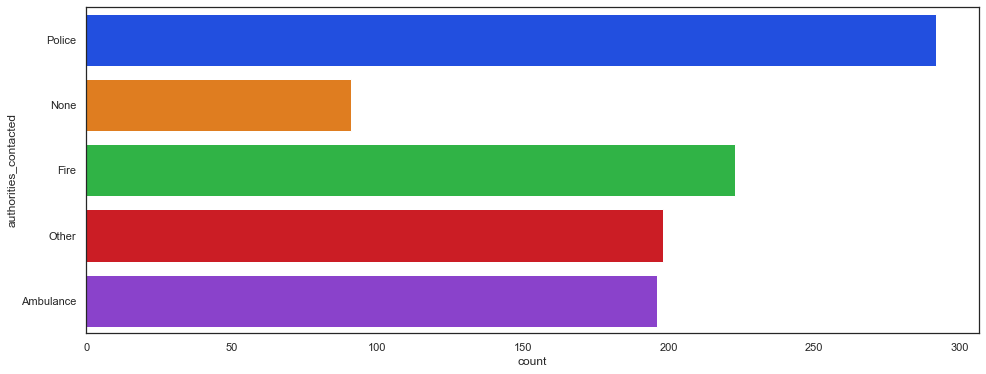

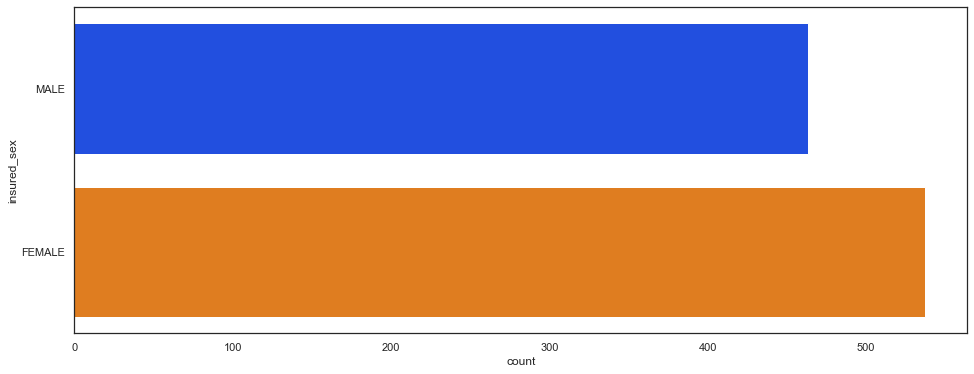

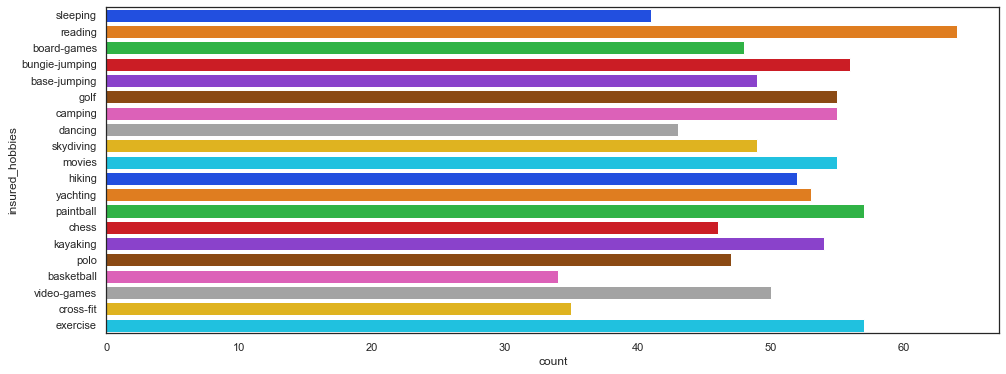

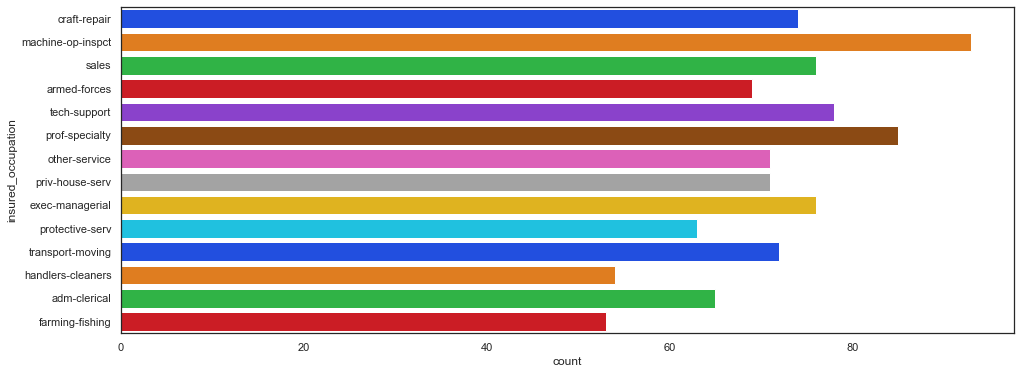

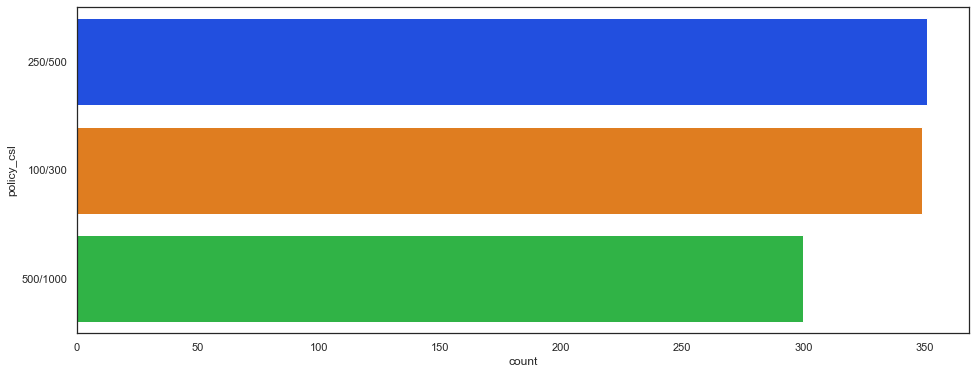

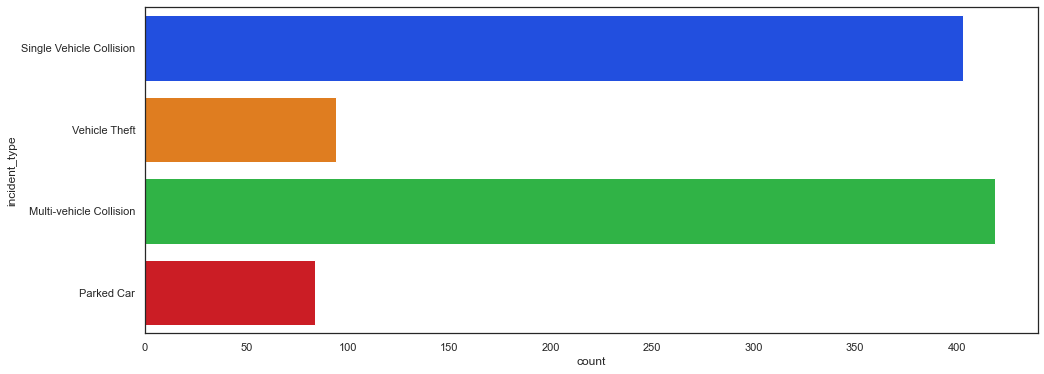

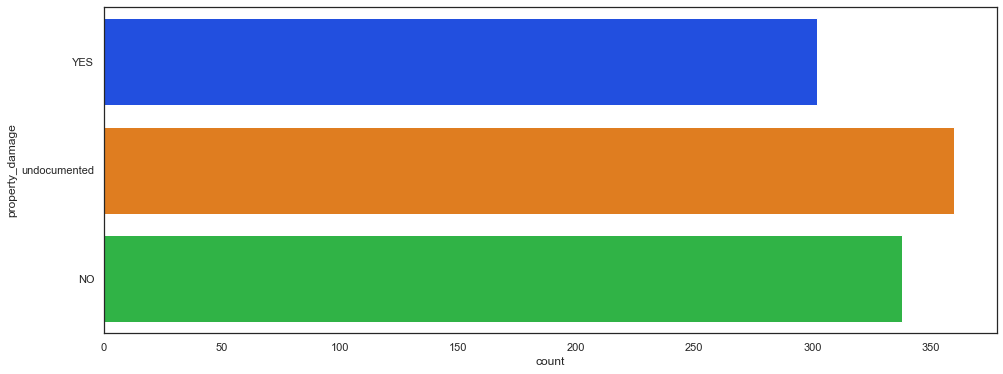

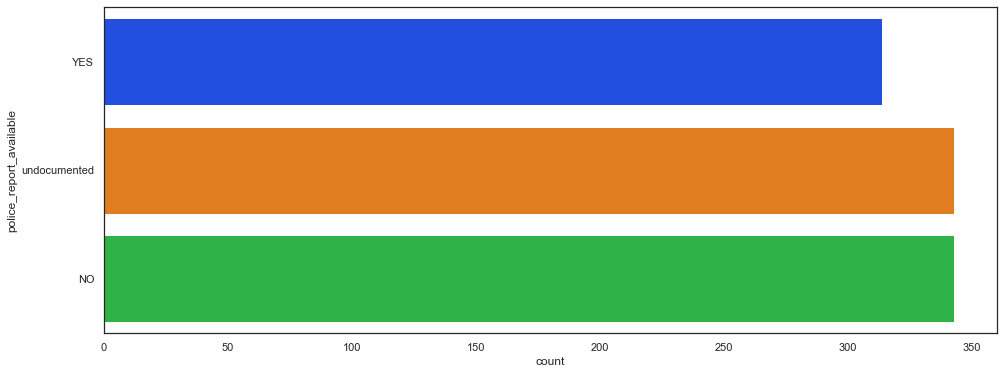

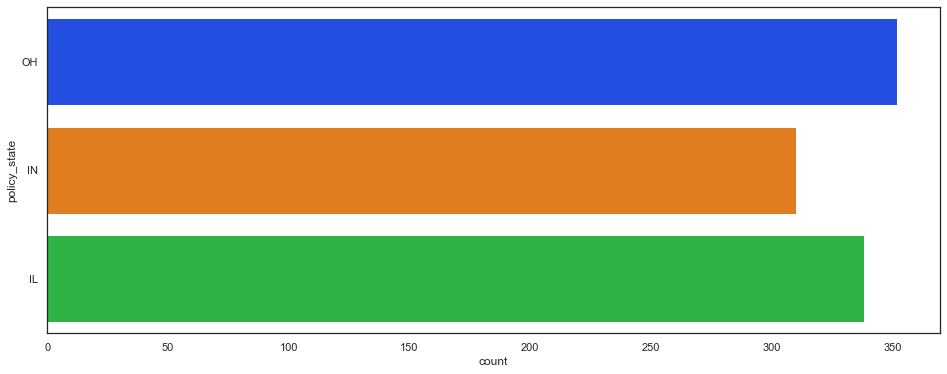

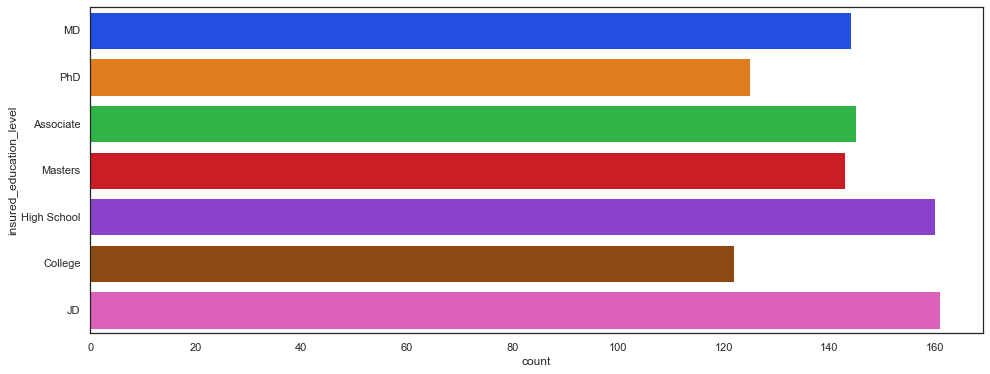

In [37]:
#countplot of discrete var  

for i, name in enumerate(df[nom_var]):
    plt.figure(i, figsize=(16,6))
    sns.countplot(y=name, data=df, palette="bright")
    
    plt.show()

**Observation of Nominal variables' counts were visualized with bar plots:**

Insured_hobbies: Reading is the highest among other hobbies.

Incident_state: New York has the highest incidents.

Insured_relationship: Own-child have the highest.

Authorities_contacted: Police are the most frequently contacted followed by the fire brigades.

Auto_make: apart from Honda (least), most are relatively even.

Insured_sex: Female is the highest.

Incident_month: January and Feb are relatively high.

Collision_type: the distribution looks evenly spread across the categories. Most are rear collisions. Smallest groups are the undocumented collisions. we can explore which collisions will be the most expensive and have the most frauds.

Incident_city: relatively even with Springfield and Arlington being the highest.

Incident_type: very few incidents are by theft/parked car. Most are by multivehicle collision and single vehicle collision. We can explore how claims and fraud differ across them.

Property_damage: relatively even but undocumented damage has the highest numbers

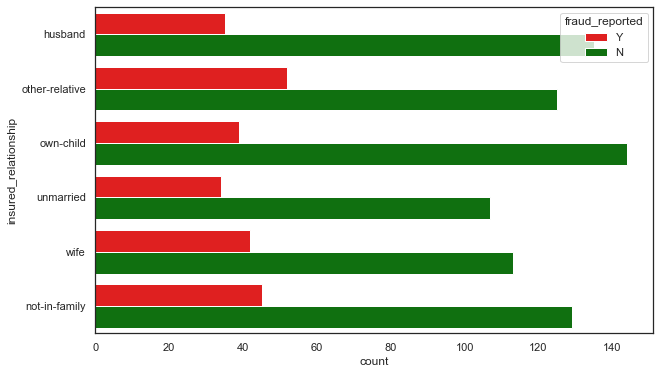

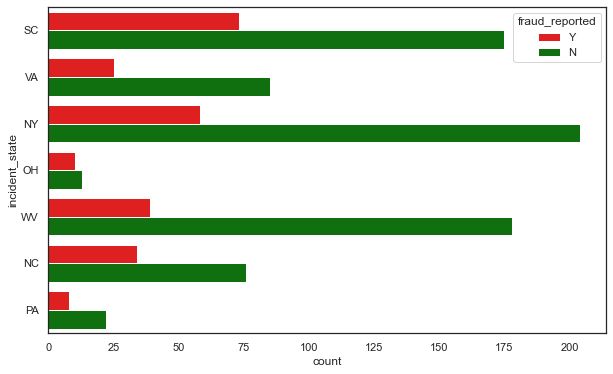

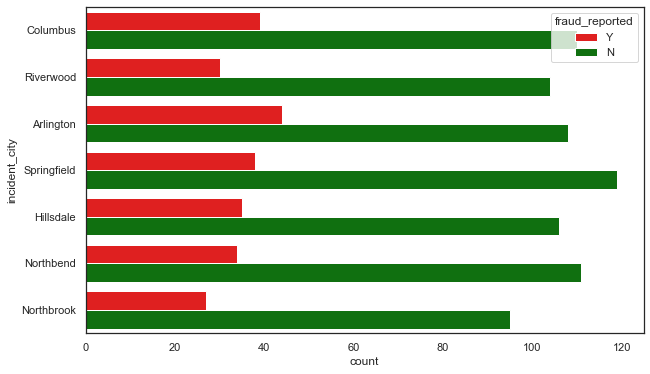

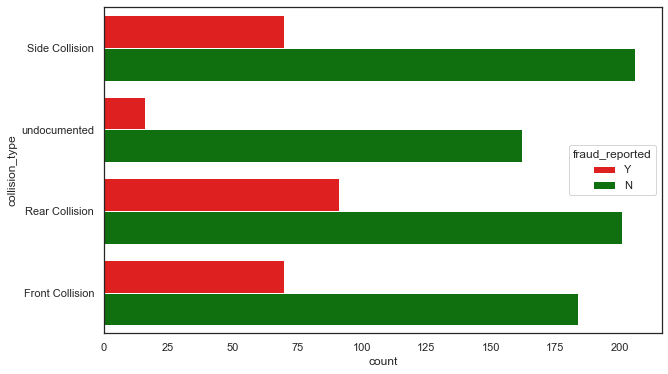

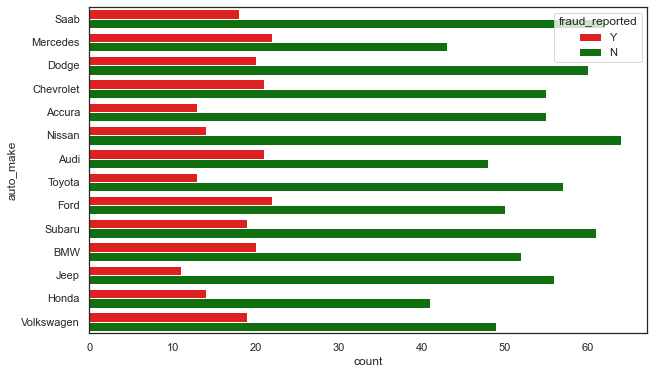

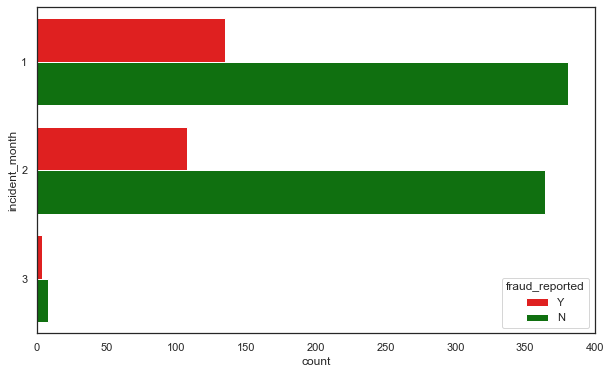

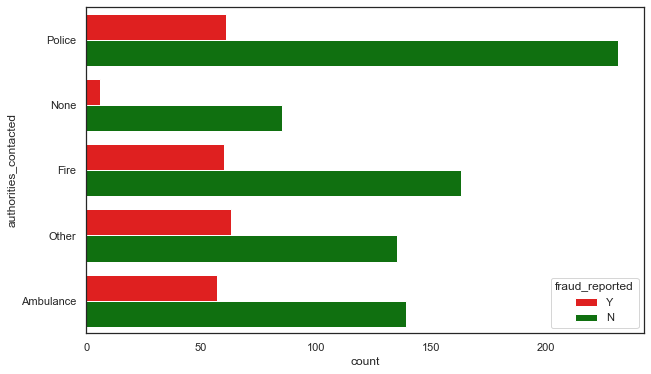

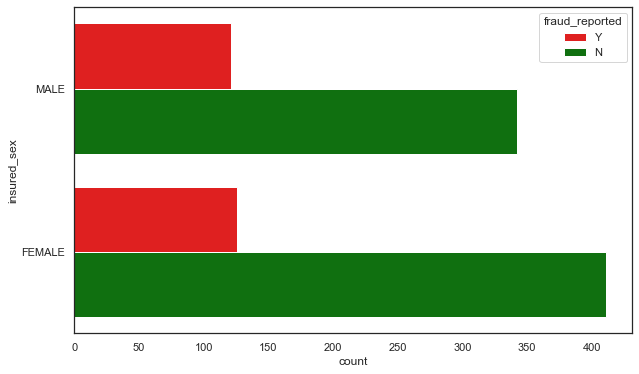

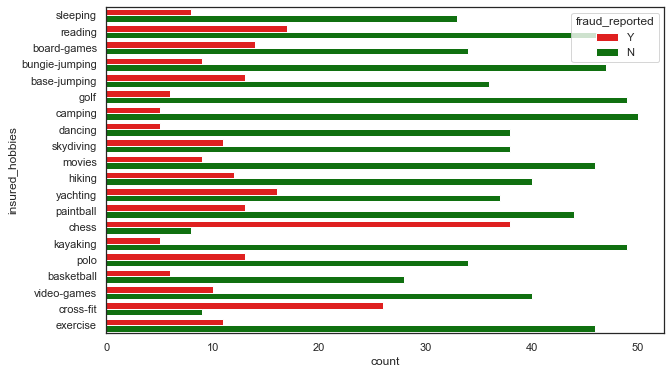

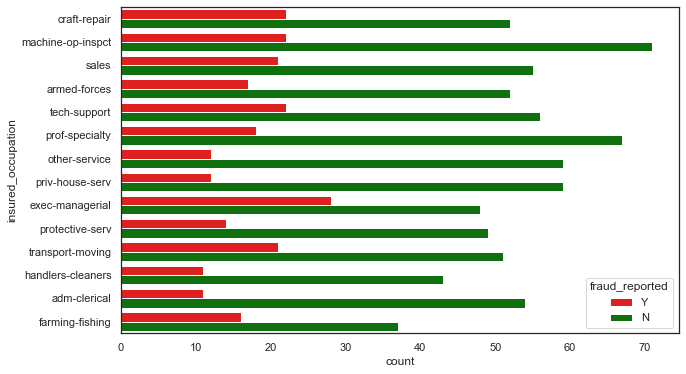

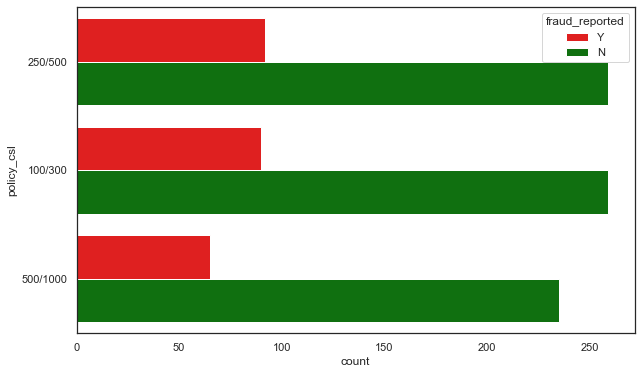

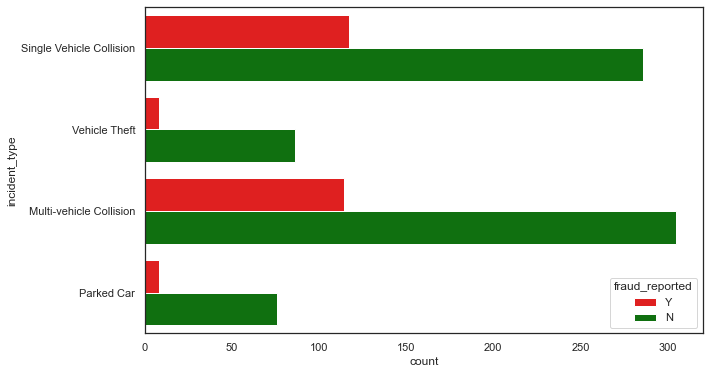

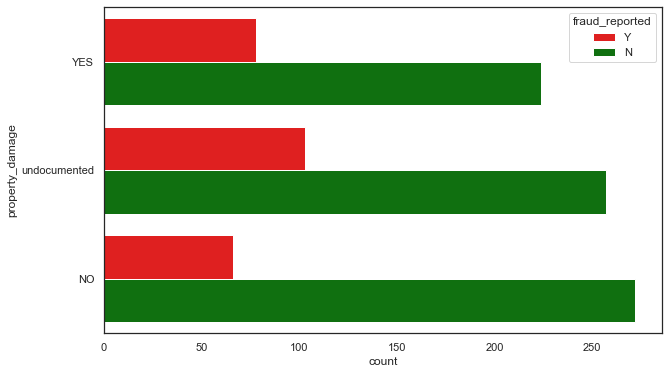

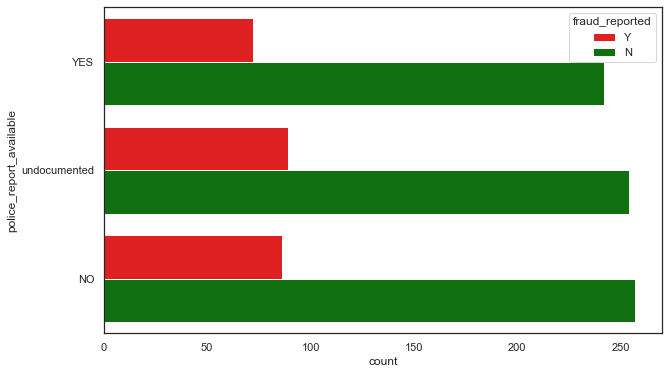

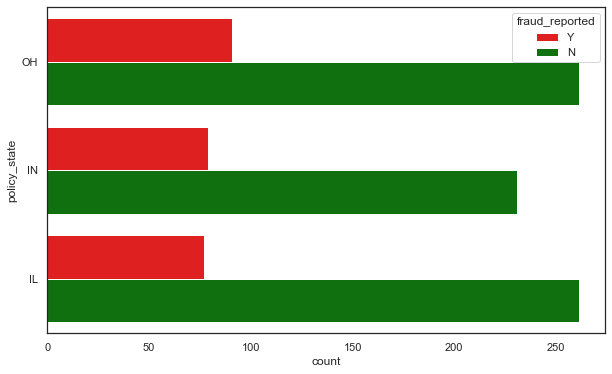

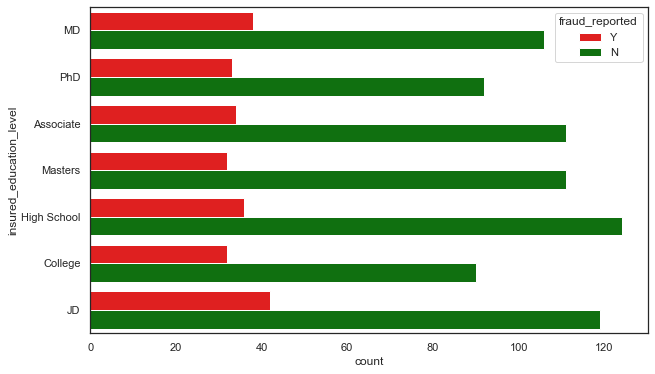

In [38]:
#each discrete var and fraud reported's dist

for i, name in enumerate(df[nom_var]):
    plt.figure(i,figsize=(10,6))
    sns.countplot(y=name, data=df, hue="fraud_reported", palette=['red','green'])

**Observation of Nominal variables'against Fraud_Report were visualized with bar plots:**

Insured_hobbies: Those who play chess has the highest tendency to do fraud.

Incident_state: South Carolina has the most fraud cases. The states names are South Carolina (SC), Virginia (VA) , New York (NY) , Ohio (OH) , West Virginia (WV) , North Carolina (NC) , Pennsylvania (PA).

Insured_relationship: Every category in this variable are mostly even (for yes and no )

Collision_type:Side , rear and front are most fraud cases. Undocumented case are very less.

Auto_make: Every category in this variable are mostly even (for yes and no )

Incident_city: Arlington has the number of fraud cases.

Incident type: Single and multi-vehicle collision are almost same in the case of fraud.

Policy_State: Every category in this variable are mostly even (for yes and no ).

Insured_sex: Every category in this variable are mostly even (for yes and no ).

Incident_month:Jan and Feb month has the number of fraud cases.

Insured_Occupation: Every category in this variable are mostly even (for yes and no ).

police_report_available: Every category in this variable are mostly even (for yes and no ).

property_damage:  Undocumented cases are high in fraud.

Authorities_contacted: Every category in this variable are mostly even (for yes and no ).

Insured_Occupation_level: Every category in this variable are mostly even (for yes and no ).

<h2>Machine learning Models </h2>

<h3>Logistic Regression </h3>

Logistic regression is a type of statistical model used to analyze and model the relationship between a binary outcome variable (such as "fraud" or "no fraud") and one or more predictor variables. The goal of logistic regression is to estimate the probability of the binary outcome as a function of the predictor variables.

In the case of fraud detection in insurance data, logistic regression could be used to model the probability of a claim being fraudulent based on various characteristics of the claim, such as the policy state, the type of incident, the severity of the incident, and so on. By fitting a logistic regression model to historical data with known outcomes (i.e. fraud or no fraud), the model can be used to predict the probability of fraud for new claims.

Logistic regression works by estimating a set of coefficients for each predictor variable that best fit the observed data. These coefficients are used to calculate the log-odds (or logit) of the probability of the binary outcome. The log-odds are then transformed back into probabilities using the logistic function, which maps the log-odds to a probability between 0 and 1. The logistic regression model can then be used to make predictions by calculating the probability of the binary outcome given a set of predictor variable values.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
# Drop unnecessary variables
df = df.drop(['policy_number', 'policy_bind_date', 'incident_date', 'incident_location', 'auto_make', 'auto_model', 'auto_year'], axis=1)

In [5]:
# Convert categorical variables to binary indicators
df = pd.get_dummies(df, columns=['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available'])


In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('fraud_reported', axis=1), df['fraud_reported'], test_size=0.3, random_state=42)

In [7]:
# Initialize and fit the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\celvi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
# Generate predictions on the test set
y_pred = lr.predict(X_test)

In [9]:
# Evaluate the performance of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.73      0.99      0.84       220
           Y       0.00      0.00      0.00        80

    accuracy                           0.73       300
   macro avg       0.37      0.50      0.42       300
weighted avg       0.54      0.73      0.62       300



Precision, recall, and F1-score are commonly used performance metrics for evaluating the effectiveness of a binary classification model such as logistic regression.

**Precision:** Precision is the proportion of true positive predictions (i.e., cases where the model correctly predicts fraud) out of all the positive predictions made by the model (i.e., cases where the model predicts fraud, whether correctly or incorrectly). Precision measures the model's ability to minimize false positives, or cases where the model incorrectly predicts fraud.

**Recall:** Recall is the proportion of true positive predictions out of all the actual positive cases in the data set (i.e., the total number of fraudulent claims in the data set). Recall measures the model's ability to identify all the positive cases, or cases of fraud, in the data set.

**F1-score:** F1-score is a weighted average of precision and recall that provides a balanced measure of the model's performance. It ranges between 0 and 1, with a score of 1 indicating perfect precision and recall and a score of 0 indicating poor performance.

We evaluate the performance of the logistic regression model using the classification_report() method from Scikit-learn. This method provides **precision**, **recall**, and **F1-score metrics** for both **fraudulent and non-fraudulent claims**, as well as an overall accuracy score for the model. These metrics can be used to assess the performance of the model and identify areas for improvement.

<h3> KNeighborsClassifier </h3>

KNN is a simple and easy-to-understand algorithm that can be used for both regression and classification problems.

The algorithm works by finding the k nearest data points to a given test point in the feature space. The majority class among these k nearest neighbors is assigned to the test point. In other words, the algorithm looks at the k closest points to the point it is trying to classify, and classifies it based on what class those k points belong to.

In the context of the auto insurance fraud dataset, KNN can be used to predict whether a claim is fraudulent or not based on the given features such as policy holder age, policy holder gender, vehicle age, and so on. The algorithm would look at the k nearest neighbors to a new claim and predict whether it is fraudulent or not based on the majority class among those neighbors.

One potential limitation of KNN is that it can be sensitive to the choice of k. If k is too small, the algorithm may be overly sensitive to noise in the data and lead to overfitting. On the other hand, if k is too large, the algorithm may miss local patterns in the data and lead to underfitting. Therefore, selecting the optimal value of k is important for achieving good performance.







In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(df.drop('fraud_reported', axis=1), df['fraud_reported'], test_size=0.3)

In [12]:
# Create a KNN classifier object

knn = KNeighborsClassifier(n_neighbors=5)

In [13]:
# Fit the model to the training data

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
# Make predictions on the test set

y_pred = knn.predict(X_test)

In [15]:
# Evaluate the model using classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.72      0.91      0.80       218
           Y       0.20      0.06      0.09        82

    accuracy                           0.68       300
   macro avg       0.46      0.48      0.45       300
weighted avg       0.58      0.68      0.61       300



<h3> RandomForestClassifier </h3>

RandomForestClassifier is a machine learning algorithm that is based on decision trees. It works by creating multiple decision trees and then combining the results to make a final prediction. It is a popular algorithm for classification problems as it has been shown to perform well in many different scenarios.

In the context of the auto insurance dataset, the RandomForestClassifier algorithm would be used to predict whether a claim is fraudulent or not based on the given variables. It works by creating a number of decision trees based on random subsets of the data and random subsets of the variables. The results of the individual decision trees are then combined to make a final prediction.

RandomForestClassifier has several advantages over other machine learning algorithms. For example, it can handle large datasets with many features, it can handle missing data and outliers, and it is not sensitive to the scale of the features. However, it can be slow to train and can be prone to overfitting if not properly tuned.

Overall, RandomForestClassifier is a strong choice for classification problems like the auto insurance dataset, especially if there are many variables and a large amount of data.

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(df.drop('fraud_reported', axis=1), df['fraud_reported'], test_size=0.3)

In [18]:
# Create a Random Forest classifier object

rf = RandomForestClassifier(n_estimators=100, max_depth=5)

In [19]:
# Fit the model to the training data

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [20]:
# Make predictions on the test set

y_pred = rf.predict(X_test)

In [21]:
# Evaluate the model using classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.75      0.98      0.85       222
           Y       0.44      0.05      0.09        78

    accuracy                           0.74       300
   macro avg       0.60      0.51      0.47       300
weighted avg       0.67      0.74      0.65       300



In [22]:
# Get the feature importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

In [23]:
# Print the feature importances
print(feature_importances)

                                importance
incident_severity_Major Damage    0.183123
insured_hobbies_chess             0.109845
incident_severity_Minor Damage    0.062069
insured_hobbies_cross-fit         0.050627
property_claim                    0.045777
...                                    ...
insured_hobbies_camping           0.000670
insured_hobbies_sleeping          0.000614
insured_hobbies_movies            0.000277
insured_hobbies_video-games       0.000000
insured_occupation_sales          0.000000

[108 rows x 1 columns]


<h3> XGBClassifier </h3>

The XGBClassifier is an implementation of the gradient boosting algorithm using the XGBoost library. It is an advanced implementation of the gradient boosting algorithm that uses parallel processing and other optimizations to speed up the training process and improve accuracy.

The XGBClassifier takes many of the same hyperparameters as the RandomForestClassifier, including the number of trees in the ensemble, the maximum depth of each tree, and the criterion used to evaluate the quality of a split. Additionally, XGBClassifier has many additional hyperparameters that allow for further customization of the algorithm, including learning rate, regularization parameters, and subsampling of the data.

Like the RandomForestClassifier, the XGBClassifier is a powerful tool for classification tasks, especially when dealing with large and complex datasets. However, due to its increased complexity, it may require more tuning and computational resources than other algorithms.

In [24]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [39]:
# Apply label encoding to the target variable
le = LabelEncoder()
df['fraud_reported'] = le.fit_transform(df['fraud_reported'])

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('fraud_reported', axis=1), df['fraud_reported'], test_size=0.3)

In [41]:
# Create an XGBoost classifier object
xgb = XGBClassifier(n_estimators=100, max_depth=5)

In [42]:
# Fit the model to the training data
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [43]:
# Make predictions on the test set
y_pred = xgb.predict(X_test)

In [44]:
# Decode the label encoded predictions
y_pred = le.inverse_transform(y_pred)

In [45]:
# Evaluate the model using classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       222
           1       0.64      0.56      0.60        78

    accuracy                           0.80       300
   macro avg       0.75      0.73      0.73       300
weighted avg       0.80      0.80      0.80       300



In [46]:
# Get the feature importances
feature_importances = pd.DataFrame(xgb.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

In [47]:
# Print the feature importances
print(feature_importances)

                                    importance
incident_severity_Major Damage        0.083334
insured_hobbies_chess                 0.079702
insured_hobbies_cross-fit             0.070349
property_damage_YES                   0.028814
insured_relationship_not-in-family    0.027976
...                                        ...
insured_hobbies_reading               0.000000
insured_hobbies_polo                  0.000000
insured_hobbies_paintball             0.000000
insured_hobbies_exercise              0.000000
insured_occupation_adm-clerical       0.000000

[108 rows x 1 columns]


<h2> Conclusion </h2>

In this project, we started by discussing the problem of fraud detection in auto insurance claims and looked at a dataset containing various features related to auto insurance claims. We then explored several machine learning algorithms to build a predictive model for fraud detection, including logistic regression, K-nearest neighbors, random forest, and XGBoost. For each algorithm, we trained the model on the training data, made predictions on the test data, and evaluated the model performance using precision, recall, and F1-score metrics.

Based on the results, it appears that the XGBoost algorithm achieved the best performance in terms of overall accuracy, precision, recall, and F1-score. However, the other algorithms also achieved reasonably good performance, and their specific strengths and weaknesses may be useful in different scenarios.

Overall, the use of machine learning algorithms for fraud detection in auto insurance claims shows promise in improving fraud detection rates and reducing losses for insurance companies. However, it is important to continue monitoring and refining these models to ensure their accuracy and effectiveness over time.